In [ ]:
# Librerias base
# Probablemente para análisis estadísticos más complejos necesitariamos
# emplear librerias especializadas como scipy o statsmodels.
# Por ahora solo vamos a usar las básicas.

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Crear carpetas para almacenar los datos
folders = ["figura_tres", "figura_cuatro", "figura_dos", "figura_uno"]
for folder in folders:
    os.makedirs(folder, exist_ok=True)
    print(f"Carpeta creada: {folder}")

Carpeta creada: figura_tres
Carpeta creada: figura_cuatro
Carpeta creada: figura_dos
Carpeta creada: figura_uno


In [ ]:
# Cargar datos desde el Excel
file_path = "all_data_tabular_data_1.xlsx"

# Leer las hojas del Excel
wos_scopus = pd.read_excel(file_path, sheet_name=0)
wos = pd.read_excel(file_path, sheet_name=1)
scopus = pd.read_excel(file_path, sheet_name=2)
reference_df = pd.read_excel(file_path, sheet_name=3)
journal_df = pd.read_excel(file_path, sheet_name=4)
author_df = pd.read_excel(file_path, sheet_name=5)
TC_all = pd.read_excel(file_path, sheet_name=6)
figure_1_data = pd.read_excel(file_path, sheet_name=7)
table_2_country = pd.read_excel(file_path, sheet_name=9)
figure_2_country_wos_scopus = pd.read_excel(file_path, sheet_name=10)
table_3_journal = pd.read_excel(file_path, sheet_name=12)
table_4_authors = pd.read_excel(file_path, sheet_name=13)
tos = pd.read_excel(file_path, sheet_name=15)
edges_tos = pd.read_excel(file_path, sheet_name=16)
nodes_tos = pd.read_excel(file_path, sheet_name=17)
SO_edges = pd.read_excel(file_path, sheet_name=18)
SO_nodes = pd.read_excel(file_path, sheet_name=19)
AU_ego_edges = pd.read_excel(file_path, sheet_name=20)
AU_ego_nodes = pd.read_excel(file_path, sheet_name=21)

print("Datos cargados correctamente.")

Datos cargados correctamente.


In [ ]:
# Guardar en CSV los datos necesarios
figure_1_data.to_csv("figura_dos/figura2.csv", index=False)
SO_edges.to_csv("figura_tres/SO_edges.csv", index=False)
SO_nodes.to_csv("figura_tres/SO_nodes.csv", index=False)
AU_ego_edges.to_csv("figura_cuatro/AU_edges.csv", index=False)
AU_ego_nodes.to_csv("figura_cuatro/AU_nodes.csv", index=False)

print("Archivos CSV guardados correctamente.")

Archivos CSV guardados correctamente.


In [ ]:
# Crear tabla con el conteo de artículos
table_1 = pd.DataFrame({
    "WoS": [len(wos)],
    "Scopus": [len(scopus)],
    "Total": [len(wos_scopus)]
})

# Mostrar tabla
import IPython.display as display
display.display(table_1)

,WoS,Scopus,Total
0,474,1039,1082


In [ ]:
# Expandir los valores de la columna DT (separados por ";")
# Aquí hubieron varios problemas que creo que se pueden trabajar desde el pre
# Básicamente estamos teniendo problemas con caracteres, por lo que se considera
# necesario limpiar los datos. O utilizar la importación con formato UTF-8.

wos_scopus_expanded = wos_scopus.assign(DT=wos_scopus["DT"].str.split(";")).explode("DT")

# Contar la cantidad de artículos por tipo
document_counts = wos_scopus_expanded["DT"].value_counts().reset_index()
document_counts.columns = ["Article Type", "Total"]

# Calcular porcentaje
document_counts["Percentage"] = round((document_counts["Total"] / document_counts["Total"].sum()) * 100, 2)

# Mostrar tabla
display.display(document_counts)


,Article Type,Total,Percentage
0,ARTICLE,533,49.08
1,CONFERENCE PAPER,457,42.08
2,REVIEW,42,3.87
3,CONFERENCE REVIEW,29,2.67
4,BOOK CHAPTER,14,1.29
5,EARLY ACCESS,4,0.37
6,DATA PAPER,2,0.18
7,BOOK,2,0.18
8,ERRATUM,1,0.09
9,CORRECTION,1,0.09


# F1

In [ ]:
# Definir el rango de años
# Toca revisar el Rpubs para este proceso xd
year_start = 2003
year_end = 2024
years_full = np.arange(year_start, year_end + 1)

# Completar datos faltantes en figure_1_data
for year in years_full:
    if year not in figure_1_data["PY"].values:
        total_wos = len(wos[wos["PY"] == year])
        total_scopus = len(scopus[scopus["PY"] == year])
        total_wos_scopus = len(wos_scopus[wos_scopus["PY"] == year])
        new_row = pd.DataFrame({"PY": [year], "total": [total_wos_scopus], "scopus": [total_scopus], "wos": [total_wos]})
        figure_1_data = pd.concat([figure_1_data, new_row], ignore_index=True)

# Ordenar datos por año
figure_1_data = figure_1_data.sort_values("PY", ascending=False)

# Calcular citas totales por año
# De aquí para abajo, los pasos se pueden simplificar hacer en el preprocesamiento para ahorrar tiempo.
TC_all = pd.DataFrame(columns=["PY", "TC_sum_all", "TC_percentage"])

for year in years_full:
    ncitas_wos = wos[wos["PY"] == year]["TC"].sum()
    ncitas_scopus = scopus[scopus["PY"] == year]["TC"].sum()
    ncitas = ncitas_wos + ncitas_scopus
    new_row_tc = pd.DataFrame({"PY": [year], "TC_sum_all": [ncitas], "TC_percentage": [None]})
    TC_all = pd.concat([TC_all, new_row_tc], ignore_index=True)

# Calcular porcentaje de citas
total_citas = TC_all["TC_sum_all"].sum()
TC_all["TC_percentage"] = round((TC_all["TC_sum_all"] / total_citas) * 100, 2)

# Asegurar formato de enteros
TC_all["TC_sum_all"] = TC_all["TC_sum_all"].astype(int)

# Ordenar por año
TC_all = TC_all.sort_values("PY", ascending=False)

print("Preprocesamiento completado.")


Preprocesamiento completado.


In [ ]:
# Extraer valores para la gráfica
tcx = TC_all["PY"].values
tcy = TC_all["TC_sum_all"].astype(int).values

tpx = figure_1_data["PY"].values
tpy = figure_1_data["total"].astype(int).values

wx = figure_1_data["PY"].values
wx1 = wx - 0.3  # Desplazamiento de barras WoS
wy = figure_1_data["wos"].astype(int).values

sx = figure_1_data["PY"].values
sx1 = sx + 0.5  # Desplazamiento de barras Scopus
sy = figure_1_data["scopus"].astype(int).values

print("Datos listos para la visualización.")


Datos listos para la visualización.


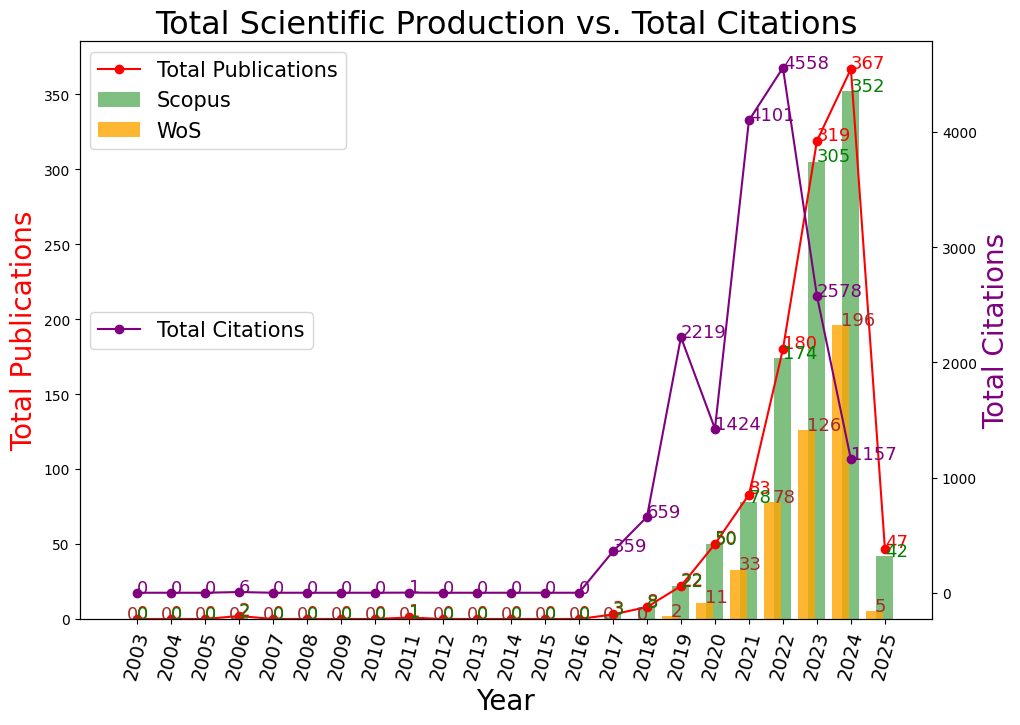

In [ ]:
# Configuración del gráfico
fig, ax = plt.subplots(figsize=(11, 7.5))

# Línea roja para total de publicaciones
ax.plot(tpx, tpy, color='r', marker='o', label='Total Publications')

# Etiquetas de ejes
ax.set_xlabel('Year', fontsize=20)
ax.set_ylabel('Total Publications', color='r', fontsize=20)

# Barras de WoS y Scopus
barw = 0.5
ax.bar(sx, sy, color='g', label='Scopus', alpha=0.5, width=barw)
ax.bar(wx1, wy, color='orange', label='WoS', alpha=0.8, width=barw)

# Segundo eje para citas totales
twin_axes = ax.twinx()
twin_axes.plot(tcx, tcy, color='purple', marker='o', label='Total Citations')
twin_axes.set_ylabel('Total Citations', color='purple', fontsize=20)

# Título y leyendas
plt.title('Total Scientific Production vs. Total Citations', fontsize=23)
ax.legend(loc='upper left', fontsize=15)
twin_axes.legend(loc='center left', fontsize=15)

# Ajustar etiquetas del eje X
ax.set_xticks(tpx)
ax.set_xticklabels(tpx.astype(int), fontsize=14, rotation=75)

# Etiquetas en las barras y puntos
for i, label in enumerate(tcy):
    twin_axes.annotate(label, (tcx[i], tcy[i] + 0.5), color='purple', size=13)
for i, label in enumerate(tpy):
    ax.annotate(label, (tpx[i], tpy[i] + 0.8), color='red', size=13)
for i, label in enumerate(wy):
    ax.annotate(label, (wx1[i], wy[i] + 0.1), color='brown', size=13)
for i, label in enumerate(sy):
    ax.annotate(label, (sx[i], sy[i] + 0.2), color='green', size=13)

# Guardar figura
plt.savefig("./figura_uno/figura_1.svg")
plt.show()
